In [3]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
cred_data= pd.read_csv(r"C:\Users\HP\Downloads\credit_risk_dataset.csv\credit_risk_dataset.csv")
cred_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
cred_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
cred_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

# Data pre-processing

In [7]:
# Handling Missing Values
cred_data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values


C:\Users\HP\AppData\Local\Temp\ipykernel_3088\258203529.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cred_data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing values


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding Categorical Variables
label_encoder = LabelEncoder()
cred_data['person_home_ownership'] = label_encoder.fit_transform(cred_data['person_home_ownership'])
cred_data['loan_intent'] = label_encoder.fit_transform(cred_data['loan_intent'])
cred_data['cb_person_default_on_file'] = label_encoder.fit_transform(cred_data['cb_person_default_on_file'])


In [9]:
# Feature Scaling
scaler = StandardScaler()
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
cred_data[numerical_features] = scaler.fit_transform(cred_data[numerical_features])


# Display the first few rows of the preprocessed dataset
cred_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.903374,-0.114143,3,28.566938,4,D,4.019404,1.545599,1,3.931411,1,-0.691554
1,-1.060904,-0.911147,2,0.053533,1,B,-1.358650,0.039027,0,-0.657458,0,-0.938167
2,-0.430783,-0.911147,0,-0.913023,3,C,-0.646849,0.573119,1,3.744110,0,-0.691554
3,-0.745843,-0.009274,3,-0.188106,3,C,4.019404,1.301707,1,3.369508,0,-0.938167
4,-0.588313,-0.188358,3,0.778450,3,C,4.019404,1.005332,1,3.556809,1,-0.444942


# EDA

In [10]:
import seaborn as sns

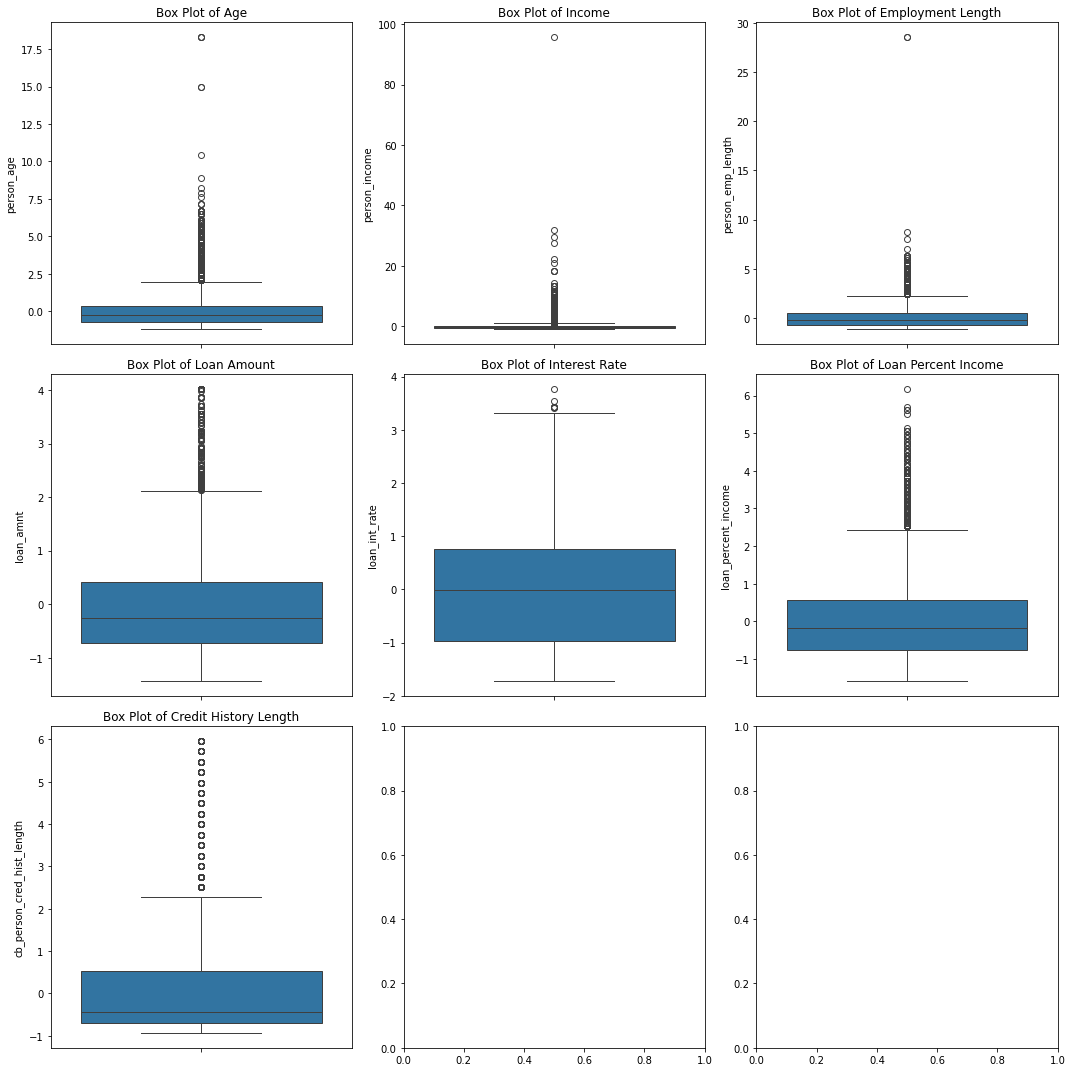

In [13]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.boxplot(y=cred_data['person_age'], ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Age')

sns.boxplot(y=cred_data['person_income'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of Income')

sns.boxplot(y=cred_data['person_emp_length'], ax=axs[0, 2])
axs[0, 2].set_title('Box Plot of Employment Length')

sns.boxplot(y=cred_data['loan_amnt'], ax=axs[1, 0])
axs[1, 0].set_title('Box Plot of Loan Amount')

sns.boxplot(y=cred_data['loan_int_rate'], ax=axs[1, 1])
axs[1, 1].set_title('Box Plot of Interest Rate')

sns.boxplot(y=cred_data['loan_percent_income'], ax=axs[1, 2])
axs[1, 2].set_title('Box Plot of Loan Percent Income')

sns.boxplot(y=cred_data['cb_person_cred_hist_length'], ax=axs[2, 0])
axs[2, 0].set_title('Box Plot of Credit History Length')

plt.tight_layout()
plt.show()


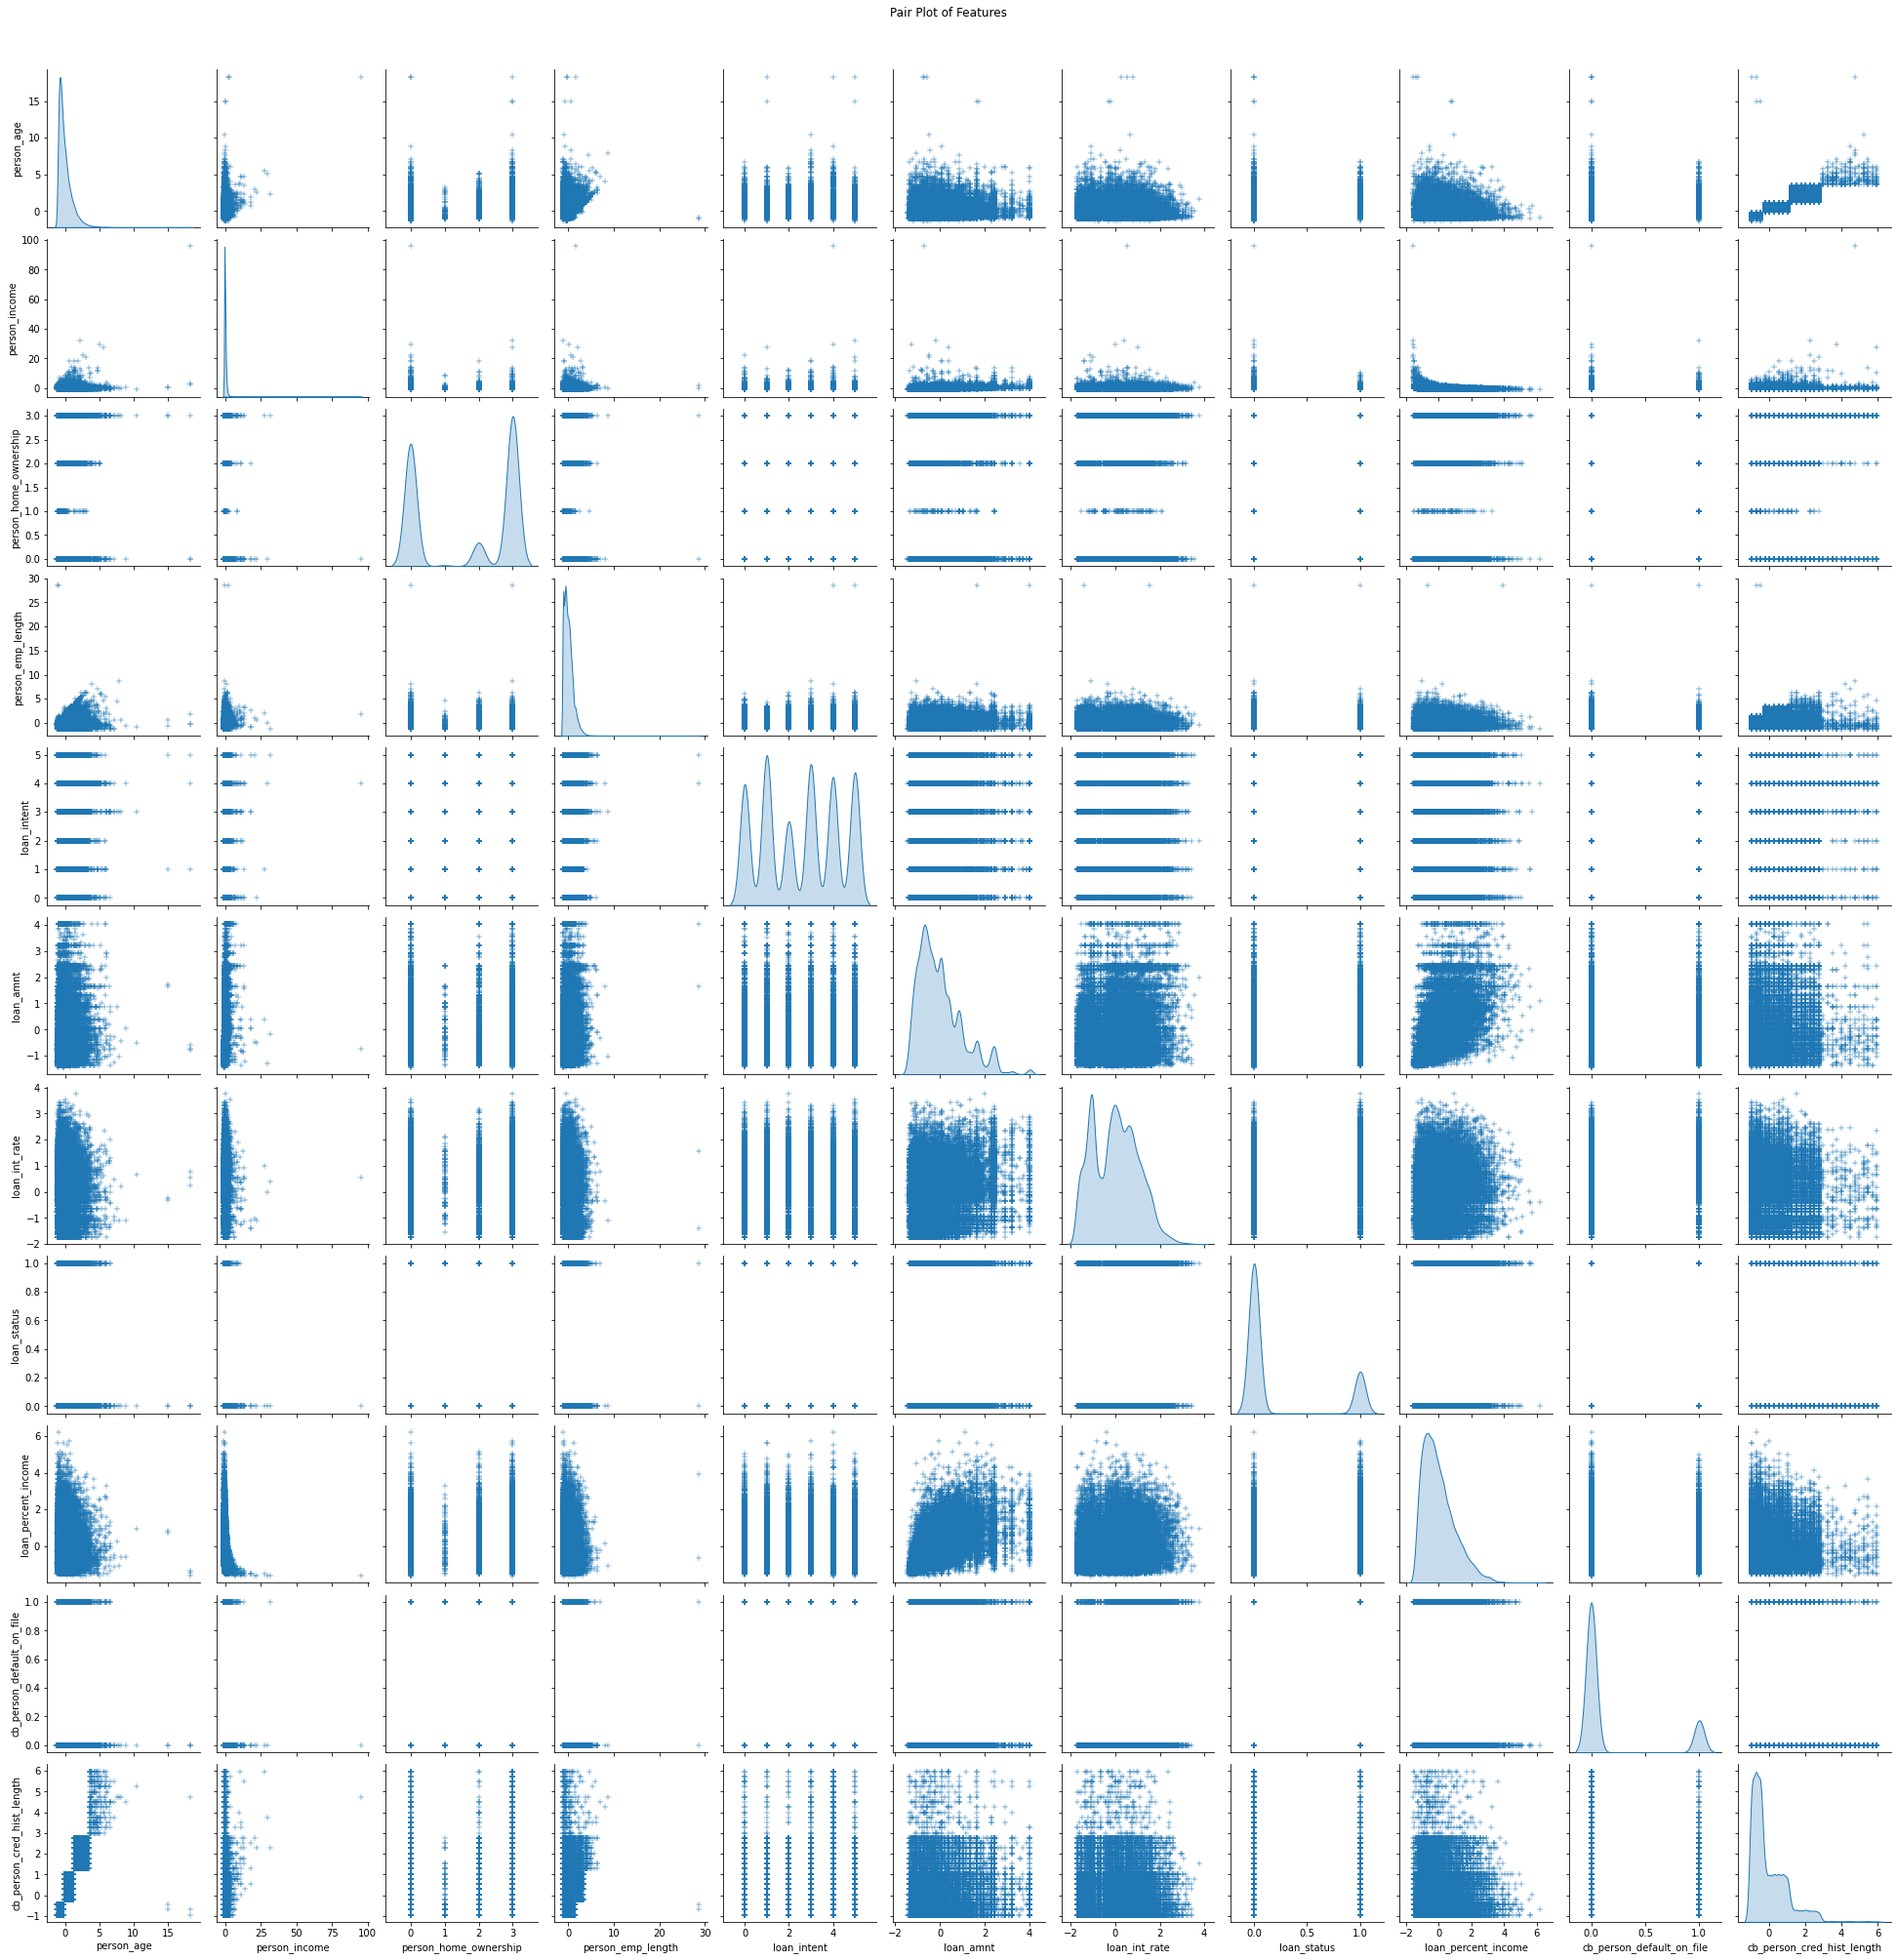

In [14]:
sns.pairplot(cred_data, diag_kind='kde', markers='+')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


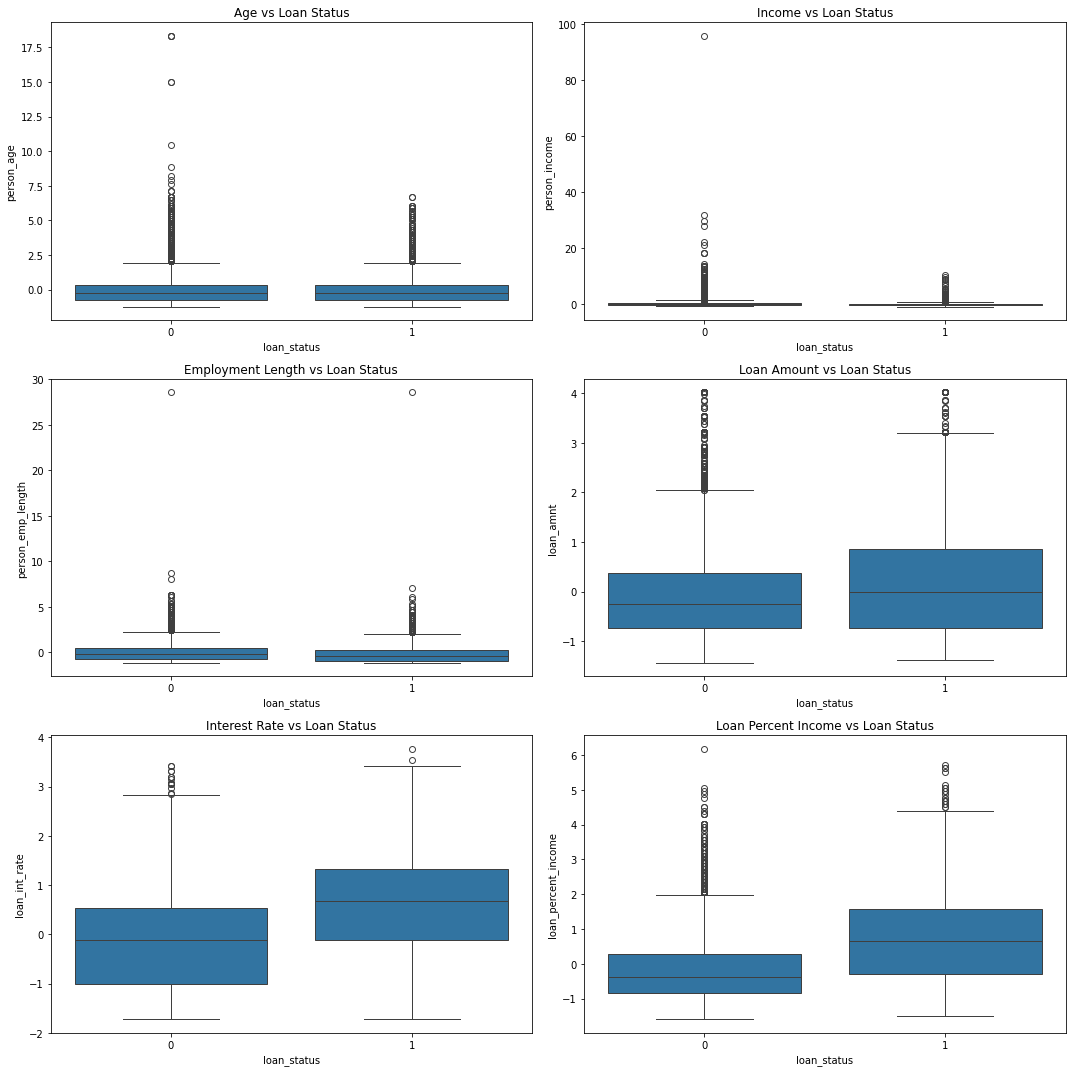

In [15]:
# Box plots for outlier detection and target variable analysis
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(x='loan_status', y='person_age', data=cred_data, ax=axs[0, 0])
axs[0, 0].set_title('Age vs Loan Status')

sns.boxplot(x='loan_status', y='person_income', data=cred_data, ax=axs[0, 1])
axs[0, 1].set_title('Income vs Loan Status')

sns.boxplot(x='loan_status', y='person_emp_length', data=cred_data, ax=axs[1, 0])
axs[1, 0].set_title('Employment Length vs Loan Status')

sns.boxplot(x='loan_status', y='loan_amnt', data=cred_data, ax=axs[1, 1])
axs[1, 1].set_title('Loan Amount vs Loan Status')

sns.boxplot(x='loan_status', y='loan_int_rate', data=cred_data, ax=axs[2, 0])
axs[2, 0].set_title('Interest Rate vs Loan Status')

sns.boxplot(x='loan_status', y='loan_percent_income', data=cred_data, ax=axs[2, 1])
axs[2, 1].set_title('Loan Percent Income vs Loan Status')

plt.tight_layout()
plt.show()


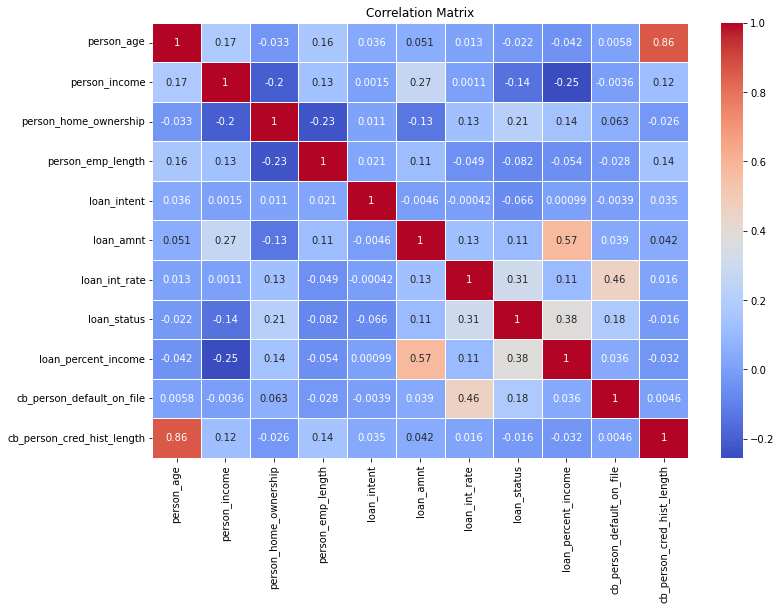

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.305635
person_home_ownership         0.211600
cb_person_default_on_file     0.179141
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
loan_intent                  -0.065575
person_emp_length            -0.081875
person_income                -0.144449
Name: loan_status, dtype: float64

In [16]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = cred_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

correlation_with_target = correlation_matrix['loan_status'].sort_values(ascending=False)
correlation_with_target

In [17]:
# Feature Engineering
cred_data['debt_to_income_ratio'] = cred_data['loan_amnt'] / cred_data['person_income']
cred_data['credit_utilization_rate'] = cred_data['loan_amnt'] / cred_data['cb_person_cred_hist_length']
cred_data['employment_to_age_ratio'] = cred_data['person_emp_length'] / cred_data['person_age']

# Display the first few rows of the dataset with new features
cred_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio,credit_utilization_rate,employment_to_age_ratio
0,-0.903374,-0.114143,3,28.566938,4,D,4.019404,1.545599,1,3.931411,1,-0.691554,-35.213667,-5.812129,-31.622499
1,-1.060904,-0.911147,2,0.053533,1,B,-1.358650,0.039027,0,-0.657458,0,-0.938167,1.491143,1.448196,-0.050460
2,-0.430783,-0.911147,0,-0.913023,3,C,-0.646849,0.573119,1,3.744110,0,-0.691554,0.709928,0.935355,2.119453
3,-0.745843,-0.009274,3,-0.188106,3,C,4.019404,1.301707,1,3.369508,0,-0.938167,-433.386139,-4.284315,0.252206
4,-0.588313,-0.188358,3,0.778450,3,C,4.019404,1.005332,1,3.556809,1,-0.444942,-21.339151,-9.033553,-1.323190


In [18]:
#Scale the new features if needed
new_features = ['debt_to_income_ratio', 'credit_utilization_rate', 'employment_to_age_ratio']
cred_data[new_features] = scaler.fit_transform(cred_data[new_features])

# Display the first few rows of the dataset with scaled new features
cred_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,debt_to_income_ratio,credit_utilization_rate,employment_to_age_ratio
0,-0.903374,-0.114143,3,28.566938,4,D,4.019404,1.545599,1,3.931411,1,-0.691554,-0.568676,-1.076733,-4.848144
1,-1.060904,-0.911147,2,0.053533,1,B,-1.358650,0.039027,0,-0.657458,0,-0.938167,0.018581,0.240093,-0.070007
2,-0.430783,-0.911147,0,-0.913023,3,C,-0.646849,0.573119,1,3.744110,0,-0.691554,0.006082,0.147077,0.258389
3,-0.745843,-0.009274,3,-0.188106,3,C,4.019404,1.301707,1,3.369508,0,-0.938167,-6.939215,-0.799629,-0.024201
4,-0.588313,-0.188358,3,0.778450,3,C,4.019404,1.005332,1,3.556809,1,-0.444942,-0.346691,-1.661012,-0.262623


In [19]:
cred_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'debt_to_income_ratio', 'credit_utilization_rate',
       'employment_to_age_ratio'],
      dtype='object')

In [21]:
cred_data['loan_interest_product'] = cred_data['loan_amnt'] * cred_data['loan_int_rate']
cred_data['loan_amount_interest_rate_interaction'] = cred_data['loan_amnt'] * cred_data['loan_int_rate']

# Binning
cred_data['income_bin'] = pd.qcut(cred_data['person_income'], 4, labels=False)
cred_data['age_group'] = pd.cut(cred_data['person_age'], bins=[0, 25, 35, 45, 100], labels=['0-25', '26-35', '36-45', '46+'])


In [22]:
cred_data.to_csv(r"C:\Users\HP\Downloads\credit_risk_dataset.csv\Credrisk_newdata.csv", index=False)